# subsub spot-checking

gully 11/22/2017

In [1]:
#! cat /Users/obsidian/Desktop/defaults.py

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [12]:
import pandas as pd

In [470]:
df = pd.read_csv('../sf/m101/output/mix_emcee/run01/spec_config.csv')
#df = pd.read_csv('../sf/V827Tau/m102/output/mix_emcee/run01/models_ff-05_50_95.csv')

In [453]:
df.head(2)

,data,wl,model_composite,model_cool50,model_hot50
0,0.209443,17294.950123,0.216415,0.008538,0.207877
1,0.205769,17295.076249,0.220419,0.008800,0.211619


## Spot check the data and model fit

You can figure out how good your initial guess is "by eye" with the routine:
`$xveganx/code/plot_specific_mix_model.py --config`

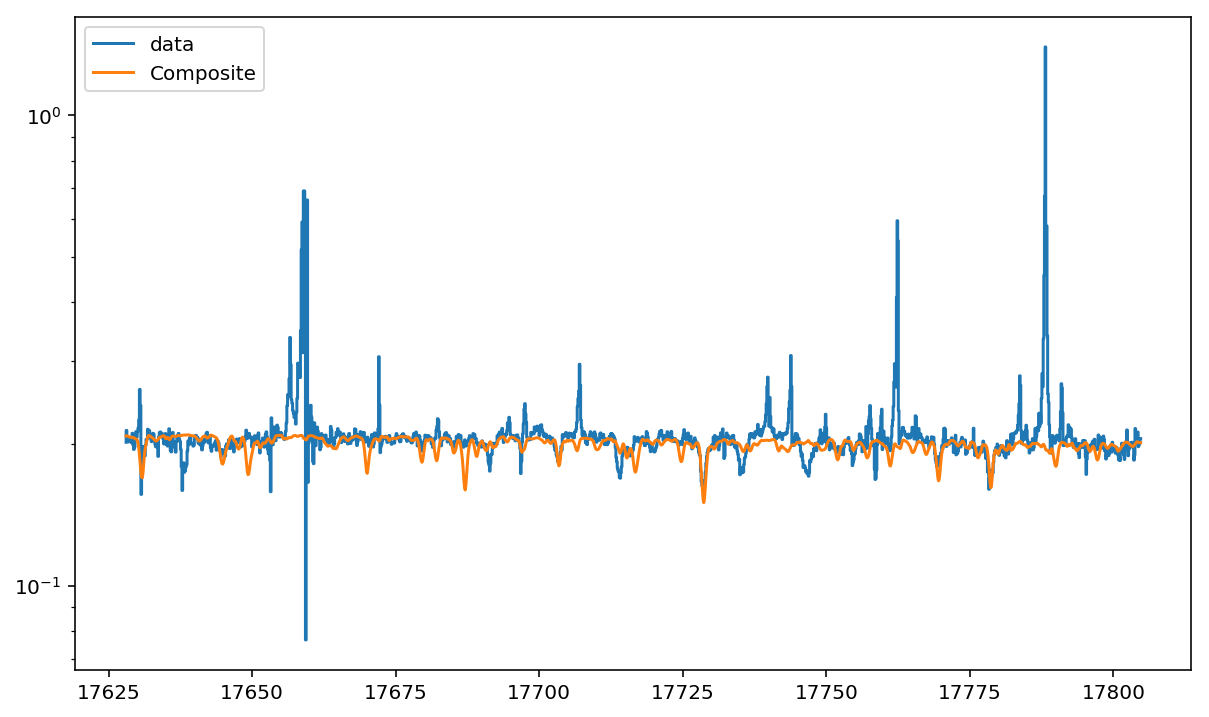

In [471]:
plt.figure(figsize=(10,6))
plt.step(df.wl, df.data, label='data')
scale = 1#df.data.median()/df.model_composite.median()
plt.plot(df.wl, df.model_composite*scale, label='Composite')
#plt.plot(df.wl, noised, label='Noised up')
#plt.plot(df.wl, df.model_cool50, label='Starspot')
#plt.plot(df.wl, df.model_hot50, label='Ambient')
plt.yscale('log')
plt.legend(loc='best')

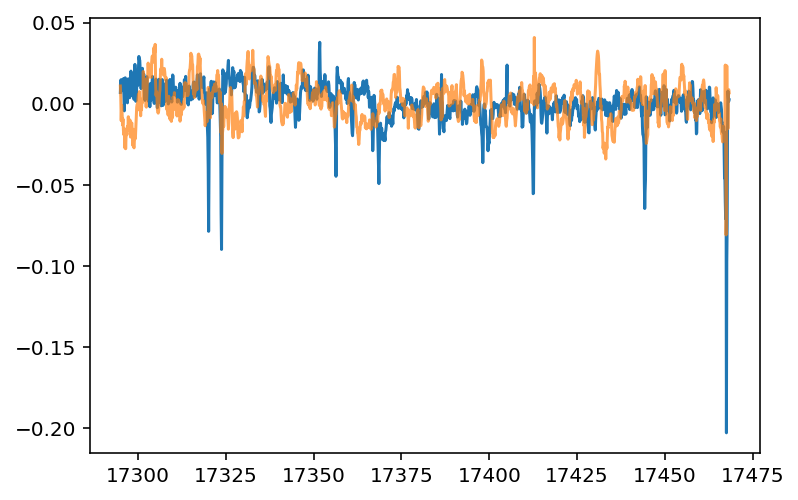

In [464]:
CC = np.load('../sf/m101/output/mix_emcee/run01/CC.npy')

noised = np.random.multivariate_normal(df.model_composite, CC)

R_GP = df.model_composite-noised
R_dat = df.model_composite-df.data

plt.plot(df.wl, R_dat)
plt.plot(df.wl, R_GP, alpha=0.7)

In [465]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]

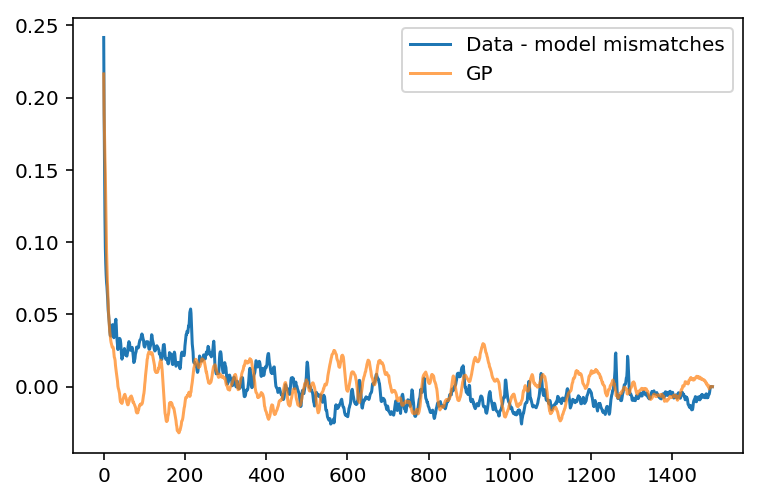

In [466]:
plt.plot(autocorr(R_dat.values), label='Data - model mismatches')
plt.plot(autocorr(R_GP.values), label = 'GP', alpha=0.7)
plt.legend(loc='best')

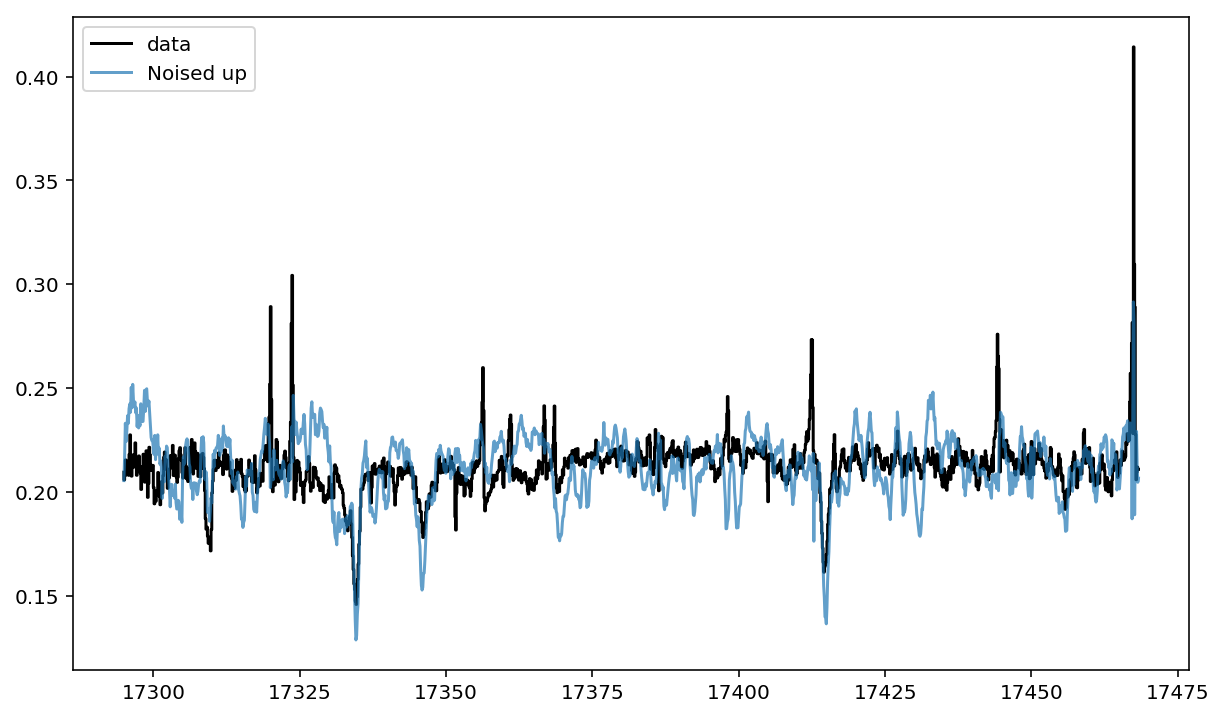

In [467]:
plt.figure(figsize=(10,6))
plt.step(df.wl, df.data, 'k', label='data')
scale = 1.0 #df.data.median()/df.model_composite.median()
#plt.plot(df.wl, df.model_composite*scale, label='Composite')
plt.plot(df.wl, noised, label='Noised up', alpha=0.7)
#plt.plot(df.wl, df.model_cool50, label='Starspot')
#plt.plot(df.wl, df.model_hot50, label='Ambient')
plt.legend(loc='best')

Need to adjust `logOmega` to get the filling factor:

In [10]:
logOmega = -5.42
logOmega2 = -5.20
f = 10**logOmega2 / (10**logOmega2 + 10**logOmega)
f

0.624001758617667

What about the MCMC chains?

In [11]:
ws = np.load("../sf/m115/output/subsub_m115/run01/emcee_chain.npy")

(You can also use `temp_emcee_chain.npy` if you're mid-way through an MCMC run.)

In [12]:
max_obs = ws.any(axis=(0,2)).sum()
max_obs

In [14]:
burned = ws[:, 0:max_obs,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [15]:
from matplotlib.ticker import MaxNLocator

In [16]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", '[Fe/H]',r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{eff}, 2}$", r"$\log{\Omega_2}$",
         r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

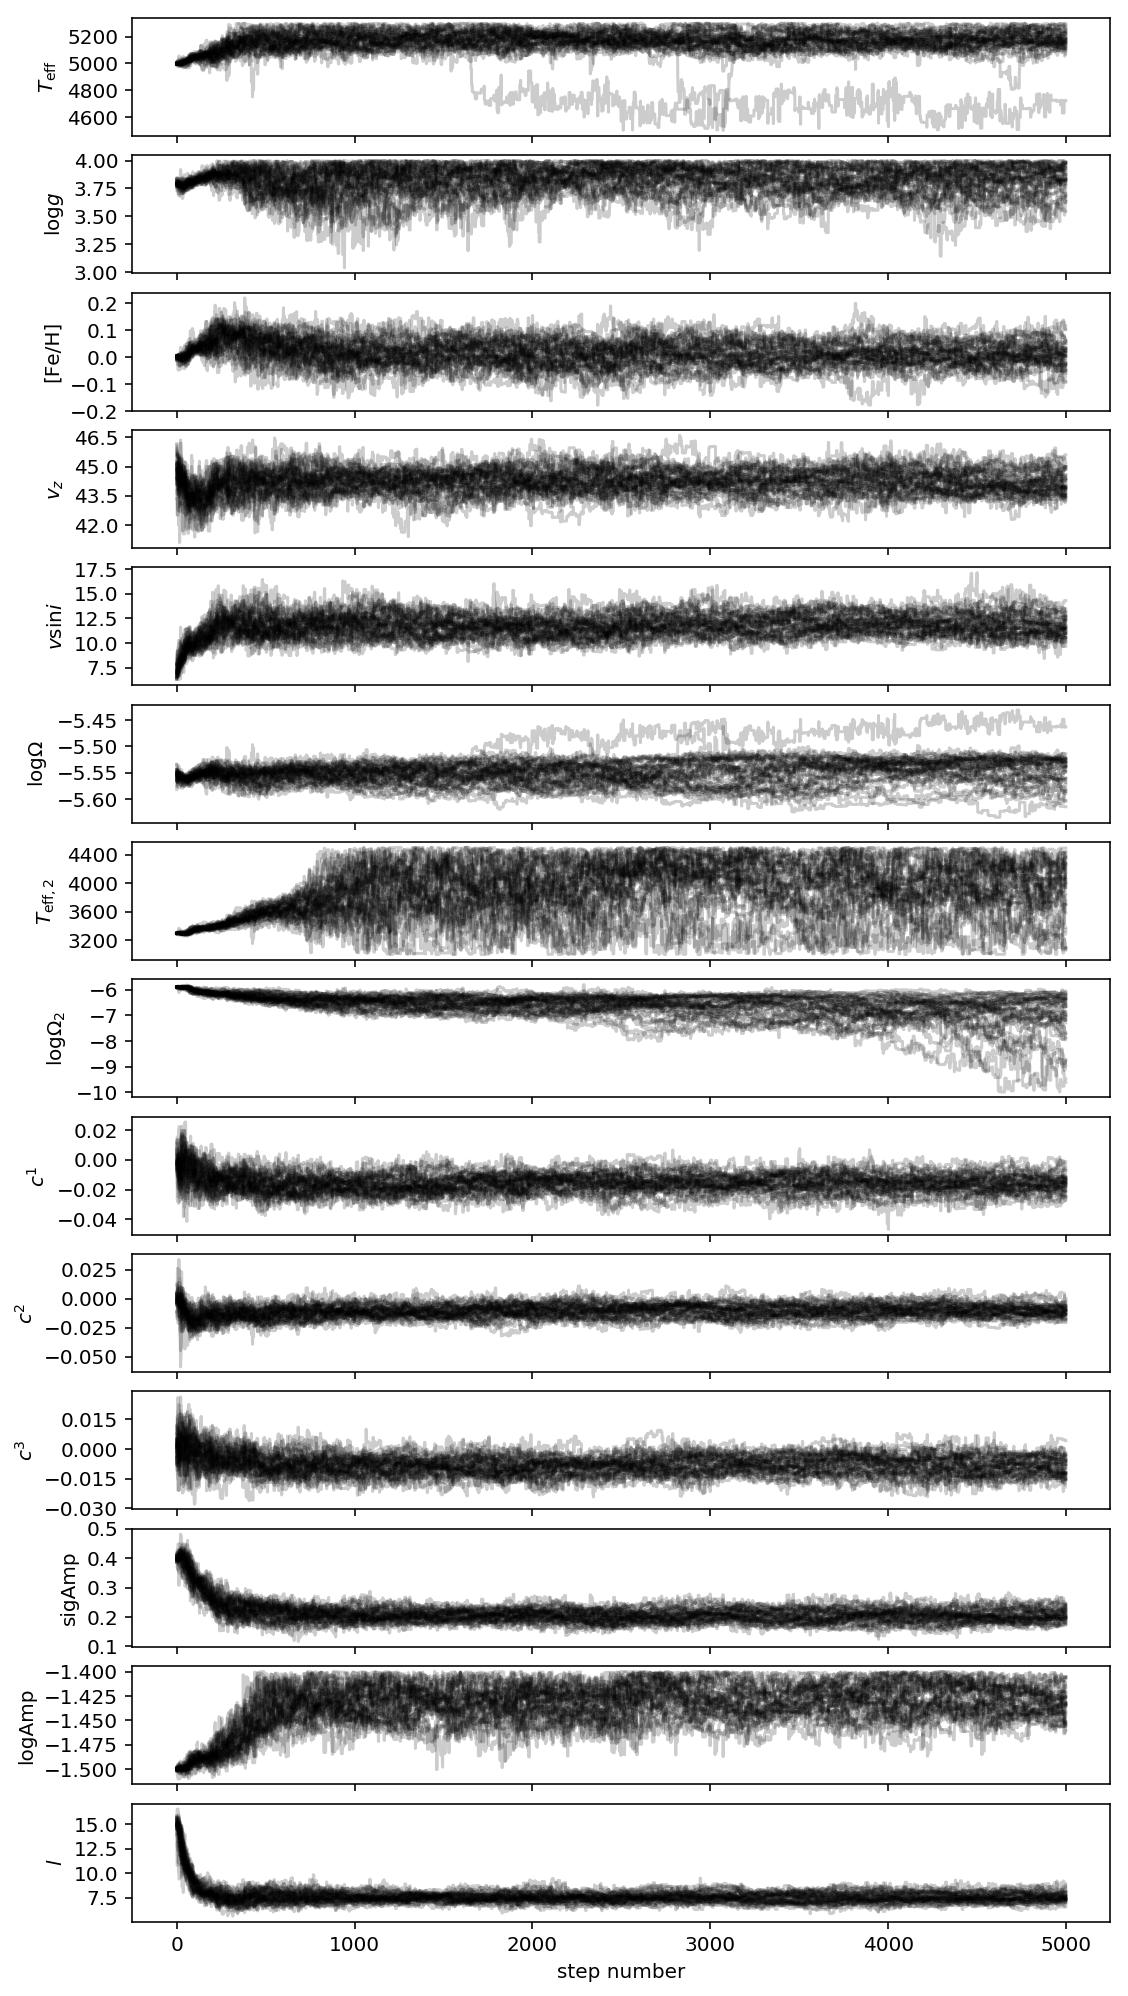

In [17]:
fig, axes = plt.subplots(14, 1, sharex=True, figsize=(8, 14))
for i in range(0, 14, 1):
    axes[i].plot(burned[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[13].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

## Posterior predictive check
What do the final 200 samples look like in spectra?

You can use the routine:  
`$xveganx/code/plot_specific_mix_model.py --OG`

(The "OG" stands for "Original Gangster", since it was my first plotting routine.)

In [20]:
df = pd.read_csv('../sf/m115/output/subsub_m115/run01/models_ff-05_50_95.csv')

In [21]:
df.head()

,data,wl,model_comp05,model_cool05,model_hot05,model_comp50,model_cool50,model_hot50,model_comp95,model_cool95,model_hot95
0,0.899906,15550.094783,0.952474,0.000250,0.952223,0.948872,0.017220,0.931652,0.945332,0.132558,0.812774
1,0.872976,15550.206892,0.952695,0.000244,0.952450,0.946854,0.016702,0.930151,0.944037,0.130554,0.813484
2,0.903221,15550.318987,0.952871,0.000244,0.952627,0.946615,0.016517,0.930099,0.945587,0.130130,0.815457
3,0.835203,15550.431065,0.954897,0.000250,0.954647,0.946809,0.016644,0.930166,0.948823,0.131280,0.817543
4,0.864358,15550.543129,0.962774,0.000261,0.962513,0.951270,0.017072,0.934199,0.954561,0.133865,0.820696


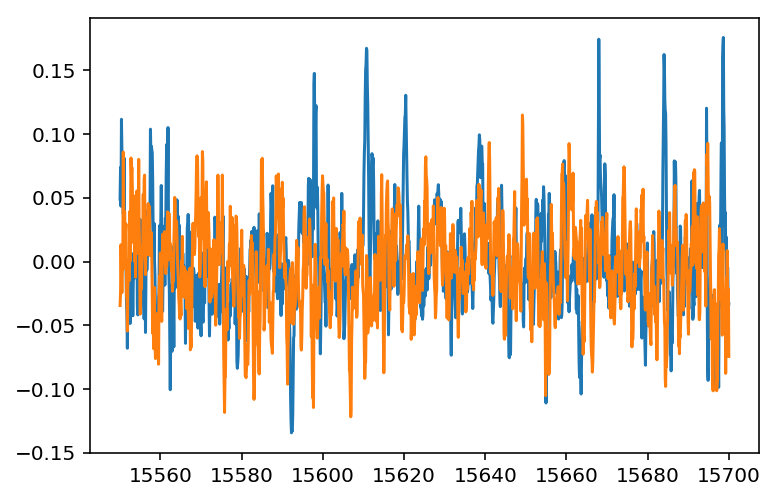

In [22]:
CC = np.load('../sf/m115/output/subsub_m115/run01/CC.npy')

noised = np.random.multivariate_normal(df.model_comp50, CC)

R_GP = df.model_comp50-noised
R_dat = df.model_comp50-df.data

plt.plot(df.wl, R_dat)
plt.plot(df.wl, R_GP)

The residual spectrum "looks like" the modeled Gaussian process noise, in terms of amplitude and scale length.  However, the amplitude is large, about 5% uncertainties in line depths or more.  This level indicates that the model is not a great match to the data.

Speaking of the model fit, let's look at it:

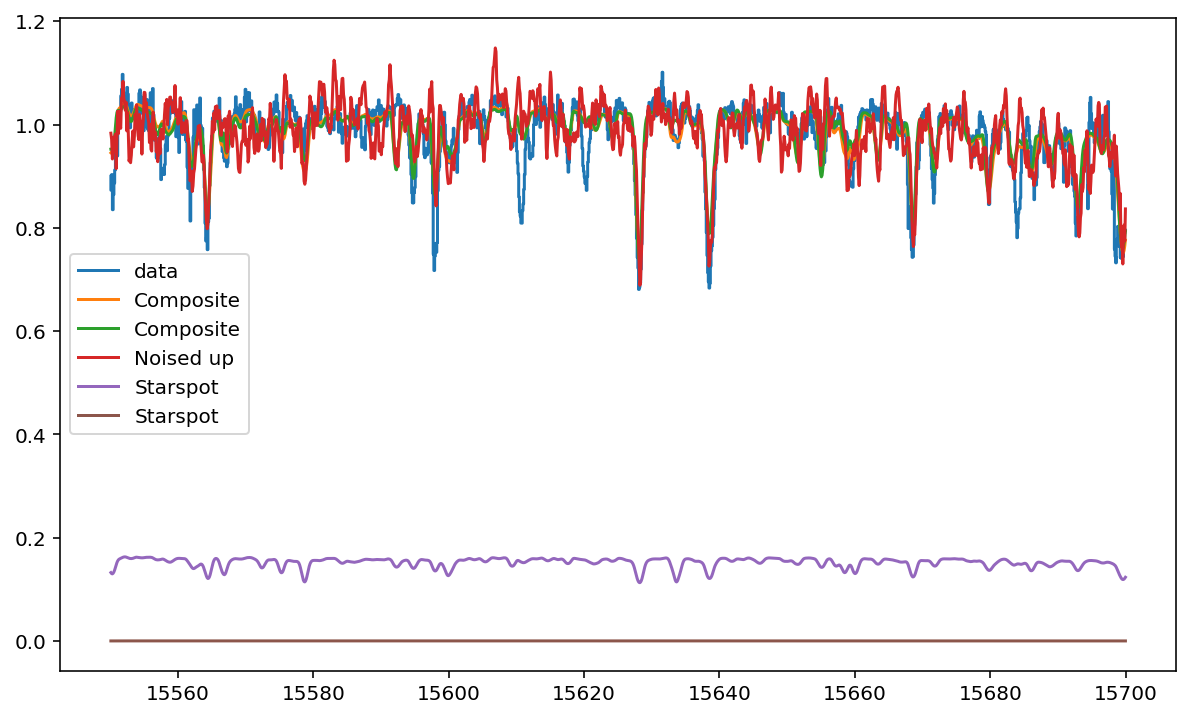

In [23]:
plt.figure(figsize=(10,6))
plt.step(df.wl, df.data, label='data')
plt.plot(df.wl, df.model_comp95, label='Composite')
plt.plot(df.wl, df.model_comp05, label='Composite')
#plt.plot(df.wl, df.model_comp05, label='Composite $-2\sigma$')
#plt.plot(df.wl, df.model_comp95, label='Composite $+2\sigma$')
plt.plot(df.wl, noised, label='Noised up')
plt.plot(df.wl, df.model_cool95, label='Starspot')
plt.plot(df.wl, df.model_cool05, label='Starspot')
#plt.plot(df.wl, df.model_hot50, label='Ambient')
plt.legend(loc='best')

The allowable range of Starspot spectrum is v

(0, 1.1557862930860148)

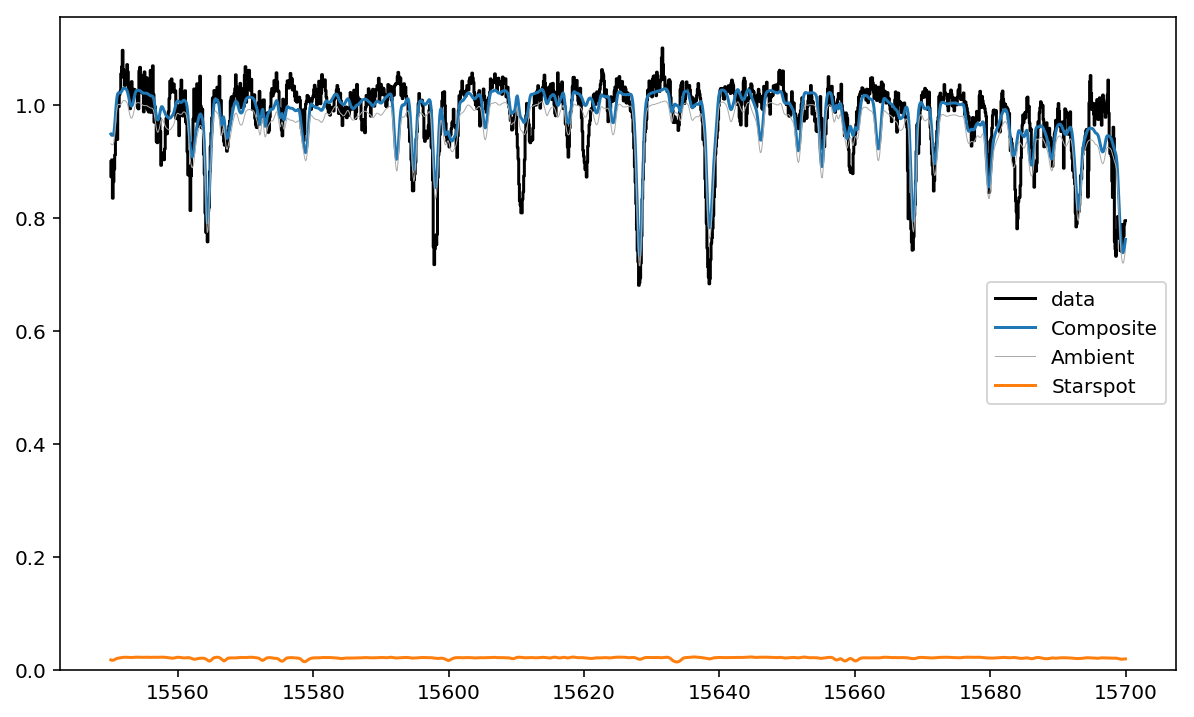

In [24]:
plt.figure(figsize=(10,6))
plt.step(df.wl, df.data, label='data', color='k')
plt.plot(df.wl, df.model_comp50, label='Composite')
plt.plot(df.wl, df.model_hot50, label='Ambient', lw=0.5, color='#AAAAAA')
plt.plot(df.wl, df.model_cool50, label='Starspot')
plt.legend(loc='best')
plt.ylim(0)

(0, 1.1718146061821686)

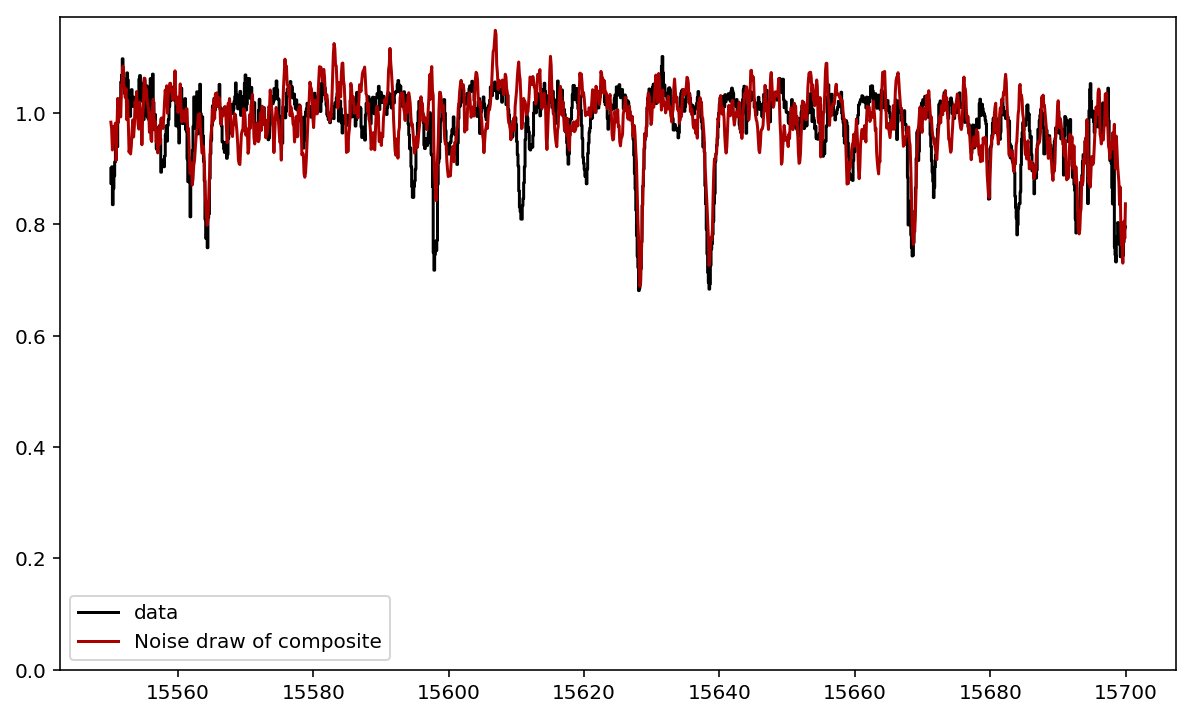

In [25]:
plt.figure(figsize=(10,6))
plt.step(df.wl, df.data, label='data', color='k')
plt.plot(df.wl, noised, label='Noise draw of composite', color='#AA0000')
plt.legend(loc='best')
plt.ylim(0)

The end.